In [87]:
#7/18/23

import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st



import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''



"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

Let's download our dataset and take a look at it.

In [88]:
ds = pd.read_csv(r'C://Users//swank//Desktop//ML7-14//Song Classification//rolling_stones_spotify.csv')
ds.head()
ds.tail()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1605,1605,Carol,The Rolling Stones,4/16/1964,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,1606,Tell Me,The Rolling Stones,4/16/1964,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,4/16/1964,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,4/16/1964,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680
1609,1609,Walking The Dog,The Rolling Stones,4/16/1964,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.969,35,189186


Data preprocessing.

In [51]:
ds.dtypes

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

We see that release_date has the 'object' format. Let's change it to datetime.

In [90]:
ds['release_date'] = pd.to_datetime(ds['release_date'])
#[Fixed]

In [53]:
ds.describe()

,Unnamed: 0,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
min,0.000000,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000
std,464.911282,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920


High energy, loudness, tempo

Is nulls-

In [91]:
ds.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [92]:
ds.duplicated().sum()
#how many duplicates as an integer

0

Static Analysis

In [93]:
ds['album'].nunique()

90

Duration in seconds for every track and year of release for every album.

In [94]:
ds['duration_sec'] = ds['duration_ms'] / 1000.0
ds['release_year'] = ds['release_date'].dt.year
ds.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_sec,release_year
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,48.640,2022
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,253.173,2022
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,263.160,2022
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,305.880,2022
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,305.106,2022


In [95]:
ds.groupby('album').agg({'popularity': 'mean', 
                         'release_year': 'max'}).sort_values('popularity', ascending=False)

,popularity,release_year
album,,
Sticky Fingers (Remastered),53.300000,1971
Some Girls,48.100000,1978
Tattoo You (2009 Re-Mastered),46.454545,1981
Exile On Main Street (2010 Re-Mastered),44.166667,1972
Beggars Banquet (50th Anniversary Edition),43.700000,1968
...,...,...
On Air,3.722222,2017
Now!,3.666667,1965
Out Of Our Heads (UK Sequence),2.583333,1965


Their 3 most popular albums are from the 70s.

check distribution

Text(0.5, 1.0, 'Distribution of the duration of the songs')

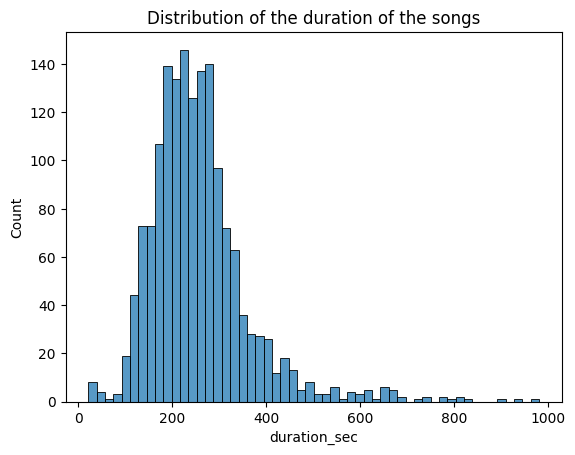

In [96]:
sns.histplot(ds['duration_sec'])
plt.title('Distribution of the duration of the songs')

live tracks go over 16 minutes

Text(0.5, 1.0, 'Distribution of the popularity of the songs')

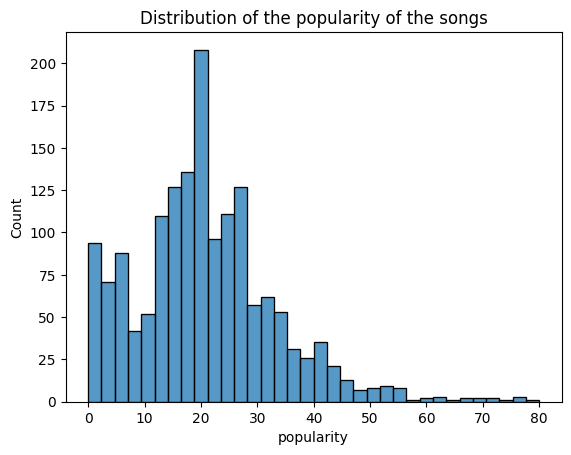

In [60]:
sns.histplot(ds['popularity'])
plt.title('Distribution of the popularity of the songs')

relation between characteristics:
1) loudness and danceability  
2) danceability and energy  
3) danceability and tempo

Scatter plot is used


Text(0.5, 1.0, 'Relation between danceability and loudness')

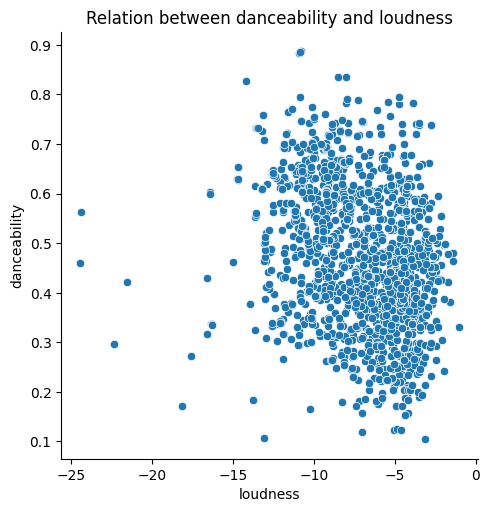

In [61]:
sns.relplot(data = ds, x='loudness', y='danceability')
plt.title('Relation between danceability and loudness')

typically loudness equates to danceability

Text(0.5, 1.0, 'Relation between danceability and energy')

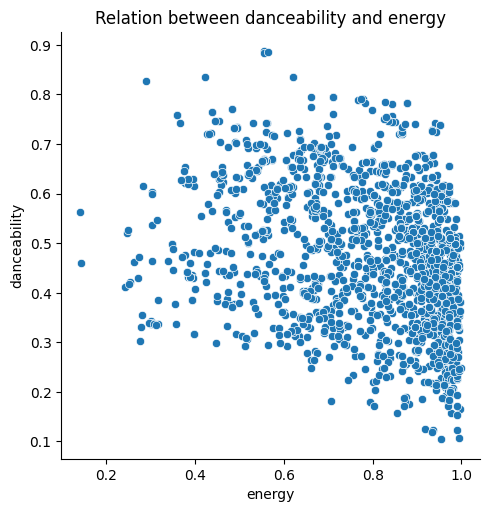

In [97]:
sns.relplot(data = ds, x='energy', y='danceability')
plt.title('Relation between danceability and energy')

Text(0.5, 1.0, 'Relation between danceability and tempo')

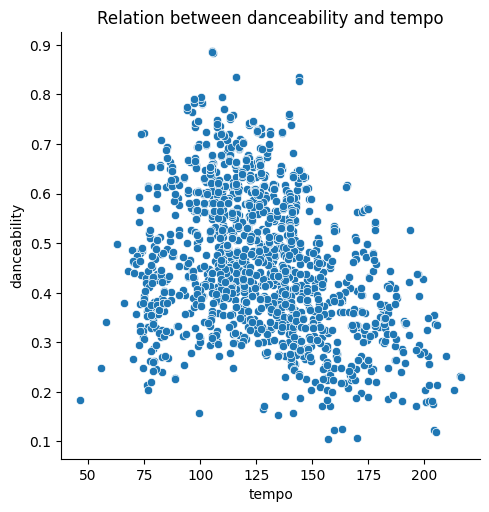

In [63]:
sns.relplot(data = ds, x='tempo', y='danceability')
plt.title('Relation between danceability and tempo')

good danceability lies inside a consistent tempo range.

pivot table with each row corresponding to an album and columns will be the summation of characteristics of songs in this album.

In [98]:
albums_pivot = pd.pivot_table(data=ds, values=['popularity', 'danceability', 'acousticness'], index='album', aggfunc='sum')
albums_pivot.head()

,acousticness,danceability,popularity
album,,,
12 X 5,2.44632,5.878,385
12 x 5,2.45365,6.046,60
A Bigger Bang (2009 Re-Mastered),1.99520,8.874,433
A Bigger Bang (Live),8.75800,7.353,400
Aftermath,2.99097,6.536,474


year of release by album

In [99]:
albums_pivot = albums_pivot.merge(ds.groupby('album')['release_year'].max(), on='album', how='left')
albums_pivot.head()


,acousticness,danceability,popularity,release_year
album,,,,
12 X 5,2.44632,5.878,385,1964
12 x 5,2.45365,6.046,60,1964
A Bigger Bang (2009 Re-Mastered),1.99520,8.874,433,2005
A Bigger Bang (Live),8.75800,7.353,400,2021
Aftermath,2.99097,6.536,474,1966


Then we can see what album was the most acoustic, danceable or popular.

In [100]:
display(
    albums_pivot.sort_values('popularity', ascending=False).head(),
    albums_pivot.sort_values('acousticness', ascending=False).head(),
    albums_pivot.sort_values('danceability', ascending=False).head()
)

,acousticness,danceability,popularity,release_year
album,,,,
Honk (Deluxe),9.671574,25.707,1232,2019
Tattoo You (Super Deluxe),11.012900,20.050,1008,2021
Goats Head Soup (Deluxe),6.662140,15.797,891,2020
Some Girls (Deluxe Version),13.816200,25.106,852,1978
Exile On Main Street (Deluxe Version),11.502060,12.521,839,1972


,acousticness,danceability,popularity,release_year
album,,,,
Voodoo Lounge Uncut (Live),16.43080,23.296,654,2018
Some Girls (Deluxe Version),13.81620,25.106,852,1978
Exile On Main Street (Bonus Track Version),11.50413,12.887,154,1972
Exile On Main Street (Deluxe Version),11.50206,12.521,839,1972
Tattoo You (Super Deluxe),11.01290,20.050,1008,2021


,acousticness,danceability,popularity,release_year
album,,,,
Honk (Deluxe),9.671574,25.707,1232,2019
Some Girls (Deluxe Version),13.816200,25.106,852,1978
Voodoo Lounge Uncut (Live),16.430800,23.296,654,2018
Tattoo You (Super Deluxe),11.012900,20.050,1008,2021
On Air (Deluxe),5.280310,17.024,573,2017


"Honk (Deluxe)" most popular album

album by decade

In [101]:
ds['decade'] = ds['release_year'] - ds['release_year'] % 10
ds[['release_year', 'decade']].head()

,release_year,decade
0,2022,2020
1,2022,2020
2,2022,2020
3,2022,2020
4,2022,2020


In [102]:
ds['decade'].unique()

array([2020, 2010, 2000, 1990, 1980, 1970, 1960])

In [103]:
albums_aggregated = ds.groupby('album').agg(
    {'decade': 'max', 
     'release_year': 'max',
     'popularity': 'sum',
     'danceability': 'sum',
     'acousticness': 'sum'})

albums_by_decades = albums_aggregated.groupby('decade', as_index=False)[['popularity', 'danceability', 'acousticness']].mean()
albums_by_decades.head()

,decade,popularity,danceability,acousticness
0,1960,263.642857,7.285929,3.654048
1,1970,405.550000,8.161350,5.901932
2,1980,273.200000,5.882200,1.912273
3,1990,458.000000,10.002800,4.753726
4,2000,563.500000,12.462000,4.939600


Text(0.5, 1.0, 'Comparison of average albums popularity by decades')

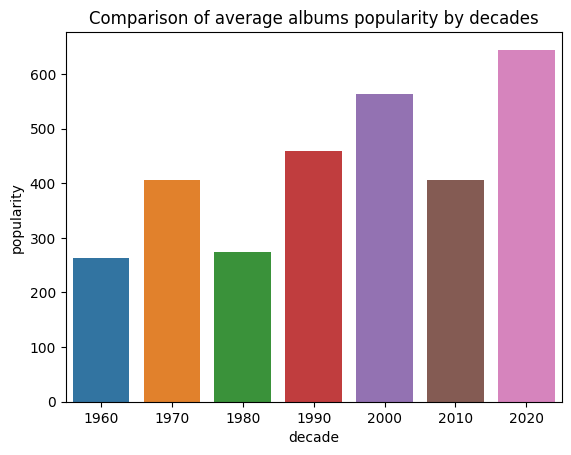

In [104]:
sns.barplot(data=albums_by_decades, x='decade', y='popularity')
plt.title('Comparison of average albums popularity by decades')

In [105]:
ds['live_factor'] = ds['name'].apply(lambda x: 'live' in x.lower())
ds[['name', 'live_factor']].head()

,name,live_factor
0,Concert Intro Music - Live,True
1,Street Fighting Man - Live,True
2,Start Me Up - Live,True
3,If You Can't Rock Me - Live,True
4,Donâ€™t Stop - Live,True


In [72]:
ds[(ds['live_factor'] == False) & ('live' in ds['album'].str.lower())]

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_sec,release_year,decade,live_factor


In [106]:
ds.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_sec,release_year,decade,live_factor
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,...,-12.913,0.1100,118.001,0.0302,33,48640,48.640,2022,2020,True
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,...,-4.803,0.0759,131.455,0.3180,34,253173,253.173,2022,2020,True
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,...,-4.936,0.1150,130.066,0.3130,34,263160,263.160,2022,2020,True
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,...,-5.535,0.1930,132.994,0.1470,32,305880,305.880,2022,2020,True
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,...,-5.098,0.0930,130.533,0.2060,32,305106,305.106,2022,2020,True


In [107]:
studio = ds[ds['live_factor'] == False]
lives = ds[ds['live_factor'] == True]

In [108]:
len(studio.groupby('album')['danceability'].sum())

62

In [109]:
len(lives.groupby('album')['danceability'].sum())

40

In [110]:
s_1 = studio.groupby('album')['danceability'].sum()
s_2 = lives.groupby('album')['danceability'].sum()

Text(0.5, 1.0, 'live albums')

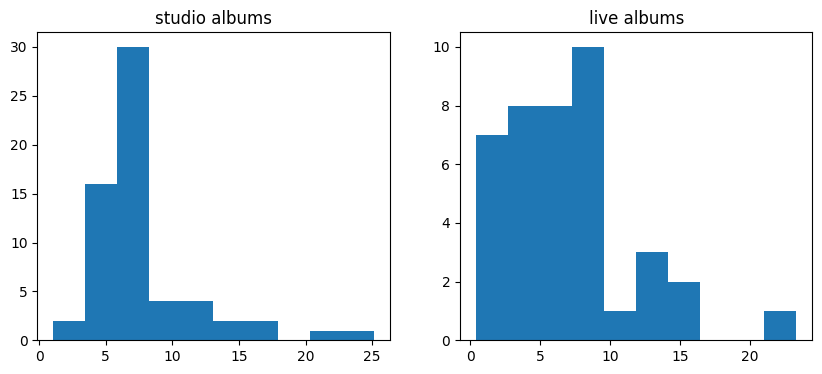

In [111]:
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(s_1)
ax[1].hist(s_2)
ax[0].set_title('studio albums')
ax[1].set_title('live albums')

small series = t-test

Text(0.5, 1.0, 'live danceability sample means')

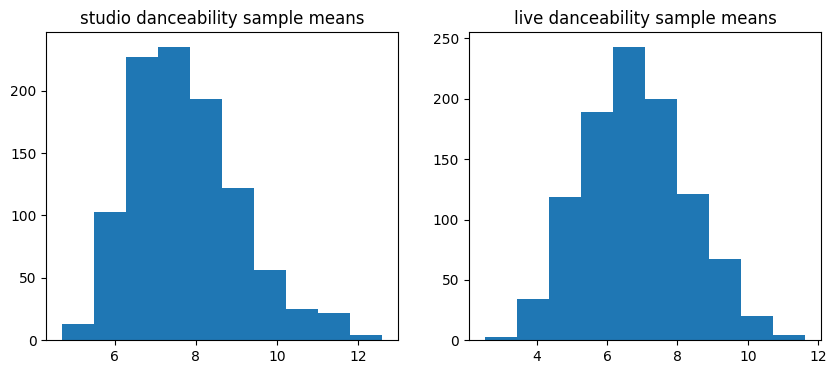

In [112]:
sr_1 = pd.Series([s_1.sample(n=10, replace=True).mean() for _ in range(1000)])
sr_2 = pd.Series([s_2.sample(n=10, replace=True).mean() for _ in range(1000)])
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(sr_1)
ax[1].hist(sr_2)
ax[0].set_title('studio danceability sample means')
ax[1].set_title('live danceability sample means')

 both distributions have a lot of non-uniformity (see the previous figure). will use the Mann-Whitney U-test

In [113]:
st.mannwhitneyu(s_2, s_1)

MannwhitneyuResult(statistic=1093.0, pvalue=0.3153214389596519)

Text(0.5, 1.0, 'live albums loudness')

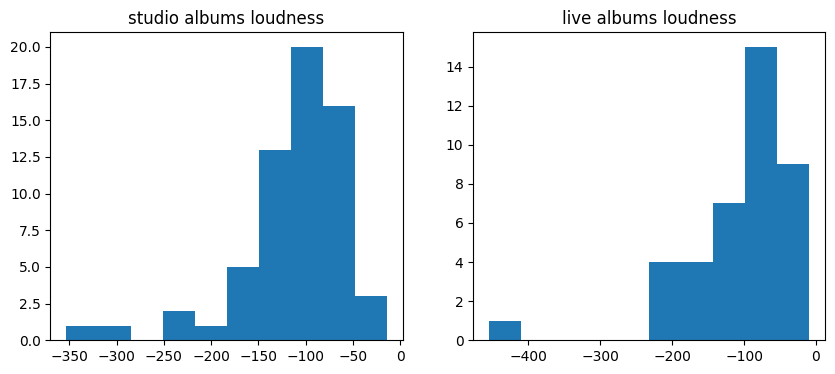

In [114]:
s_1 = studio.groupby('album')['loudness'].sum()
s_2 = lives.groupby('album')['loudness'].sum()
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(s_1)
ax[1].hist(s_2)
ax[0].set_title('studio albums loudness')
ax[1].set_title('live albums loudness')

In [115]:
st.mannwhitneyu(s_2, s_1)

MannwhitneyuResult(statistic=1299.0, pvalue=0.6884480683999278)

Text(0.5, 1.0, 'live albums energy')

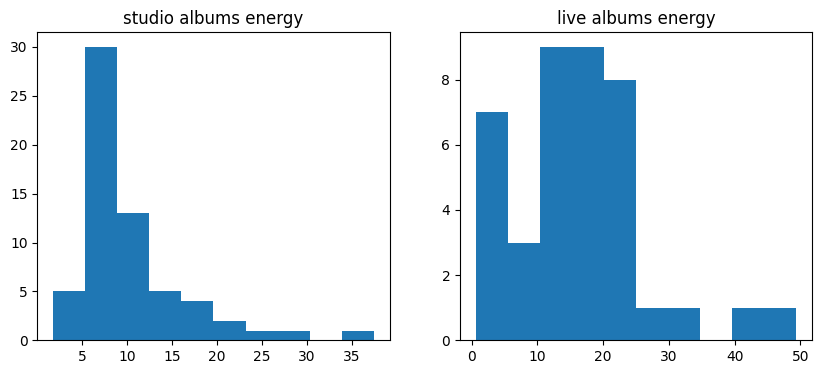

In [116]:
s_1 = studio.groupby('album')['energy'].sum()
s_2 = lives.groupby('album')['energy'].sum()
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax[0].hist(s_1)
ax[1].hist(s_2)
ax[0].set_title('studio albums energy')
ax[1].set_title('live albums energy')

In [117]:
st.mannwhitneyu(s_2, s_1)

MannwhitneyuResult(statistic=1707.0, pvalue=0.0013866513671259002)

one-tailed test for significance

In [118]:
st.mannwhitneyu(s_2, s_1, alternative='greater')

MannwhitneyuResult(statistic=1707.0, pvalue=0.0006933256835629501)

In Conclusion:
Their fame came in two waves essentially, of their initial outbreak into music, and a second wave when they were 'rediscovered' by the next generation of music lovers.
